<a href="https://colab.research.google.com/github/dasyncopator/ECE-363N-ME-379N-Engineering-Acoustics/blob/main/Homework_6_Double_Panel_Transmission_Loss_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pi = np.pi
rho = 1.225 # Atmospheric air density (kg/m^3)
c = 343 # Sound speed, air (m/s)
z = rho*c # Impedance
m1 = 12 # Linear density, left wall (kg/m)
m2 = 12 # Linear density, right wall (kg/m)
L = 0.01 # Gap between walls (m)
P_plus = 1 # Incident pressure on left wall

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


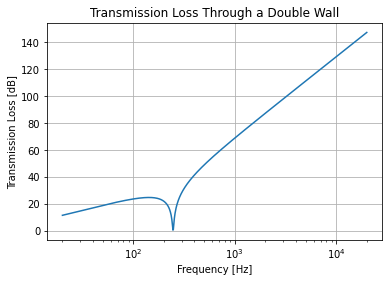

In [3]:
n = 10000 # Number of calculations/frequencies to test
f = np.linspace(20, 20e3, n) # Frequencies from 20 Hz to 20 kHz

# Create function that solves for and returns p_tr_i for a single frequency f_i
def solve_P_tr_i(f_i):
  # Define omega
  w_i = 2*pi*f_i

  # Construct matrix A(w_i); for complex values, use the complex() function built-in with Python.
  A = np.array([[1, 0, 0, 0, -1],
                [0, 1, 0, 0, -1], 
                [0, 0, 0, 0, 1], 
                [0, 0, 0, -1, 0], 
                [0, 0, 1, 0, 0]], dtype=np.complex_)
  A[0, 2] = complex(0, -(w_i*m1))
  A[1, 3] = complex(0, (w_i*m2))
  A[2, 2] = complex(0, ((z*c)/(w_i*L)))
  A[2, 3] = complex(0, -((z*c)/(w_i*L)))
  A[3, 1] = 1/z
  A[4, 0] = 1/z

  # Construct vector b
  b = np.array([-P_plus, 0, 0, 0, P_plus/z])

  # Solve for x_i
  x_i = np.linalg.solve(A, b)

  # Find P_tr_i
  P_tr_i = x_i[1]

  return P_tr_i

# Create function that allows input of 1D vector of frequencies into the function above rather than a single frequency using np.vectorize()
vect_P_tr_i = np.vectorize(solve_P_tr_i) 

# Create a vector containing all p_tr_i values
P_tr = vect_P_tr_i(f)

# Create vector containing all TL values
TL = 20*np.log10(P_plus/P_tr)

# Plot results
plt.plot(f, TL)
plt.title('Transmission Loss Through a Double Wall')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Transmission Loss [dB]')
plt.rcParams["figure.figsize"] = (6,5)
plt.grid()